In [1]:
pip install yfinance


     -------------------------------------- 73.5/73.5 kB 680.3 kB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 1.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138938 sha256=c95846c4081f9ebd052c926dcaf0999790983ba146303d30f081098ec1d7ea54
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\ee\67\14\8bcb7972056076fb11e959bbda198722e3d0ca73b5fde53f3b
Successfully built peewee
  Attempting uninstall: requests
    Found exi

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.27 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [4]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# Define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# List of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

# Download data
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Reset index to bring Date into the columns
data = data.reset_index()

# Flatten the MultiIndex columns
data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in data.columns.values]

# Print the column names to verify
print(data.columns)

# Melt the DataFrame to long format
data_melted = pd.melt(data, id_vars=['Date'], var_name='Ticker_Attribute', value_name='Value')

# Split the Ticker_Attribute into separate columns
data_melted[['Attribute', 'Ticker']] = data_melted['Ticker_Attribute'].str.split('_', expand=True)

# Drop the combined column
data_melted = data_melted.drop(columns=['Ticker_Attribute'])

# Pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')

# Reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

# Display the first few rows
print(stock_data.head())


Index(['Date', 'Adj Close_HDFCBANK.NS', 'Adj Close_INFY.NS',
       'Adj Close_RELIANCE.NS', 'Adj Close_TCS.NS', 'Close_HDFCBANK.NS',
       'Close_INFY.NS', 'Close_RELIANCE.NS', 'Close_TCS.NS',
       'High_HDFCBANK.NS', 'High_INFY.NS', 'High_RELIANCE.NS', 'High_TCS.NS',
       'Low_HDFCBANK.NS', 'Low_INFY.NS', 'Low_RELIANCE.NS', 'Low_TCS.NS',
       'Open_HDFCBANK.NS', 'Open_INFY.NS', 'Open_RELIANCE.NS', 'Open_TCS.NS',
       'Volume_HDFCBANK.NS', 'Volume_INFY.NS', 'Volume_RELIANCE.NS',
       'Volume_TCS.NS'],
      dtype='object')
Attribute       Date       Ticker    Adj Close        Close         High  \
0         2023-08-04  HDFCBANK.NS  1629.942383  1652.199951  1656.500000   
1         2023-08-04      INFY.NS  1353.111084  1378.349976  1385.900024   
2         2023-08-04  RELIANCE.NS  2500.716309  2509.550049  2516.000000   
3         2023-08-04       TCS.NS  3386.286865  3443.550049  3471.000000   
4         2023-08-07  HDFCBANK.NS  1629.005249  1651.250000  1663.099976   

At

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

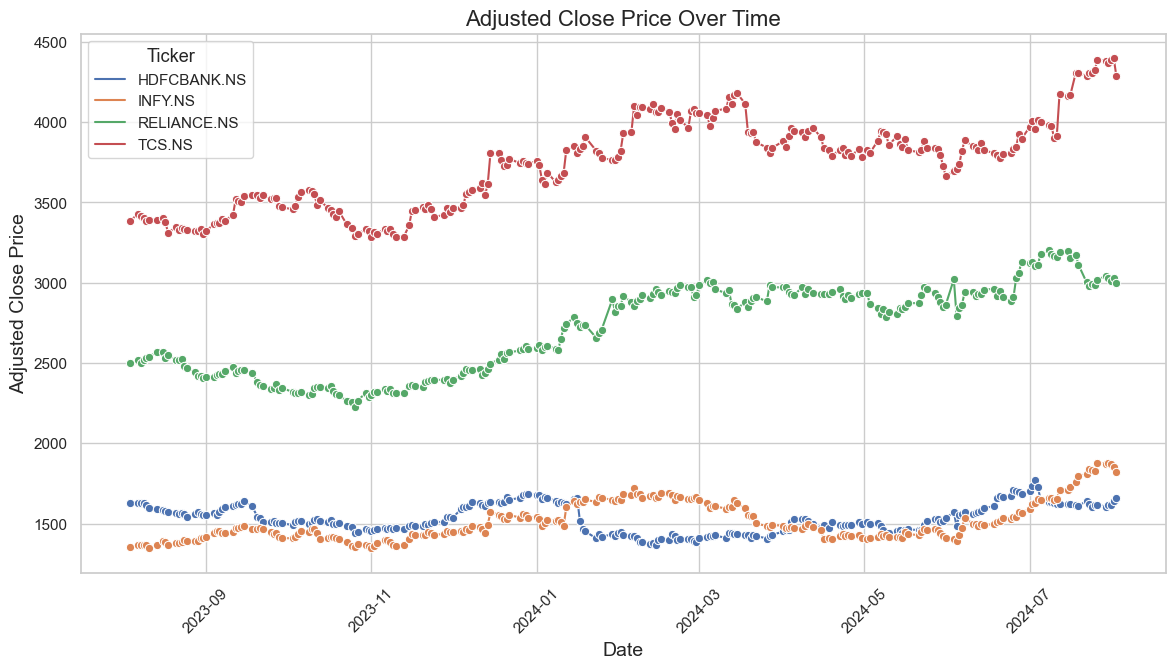

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance,
while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

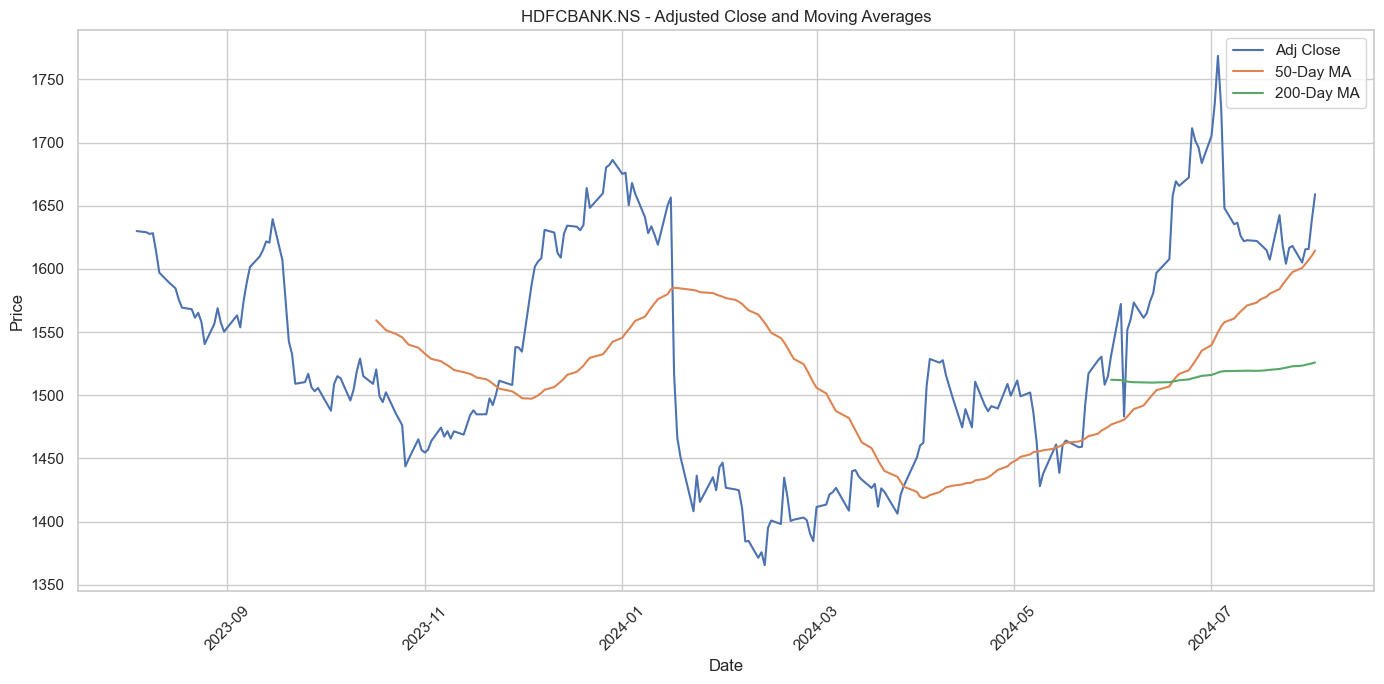

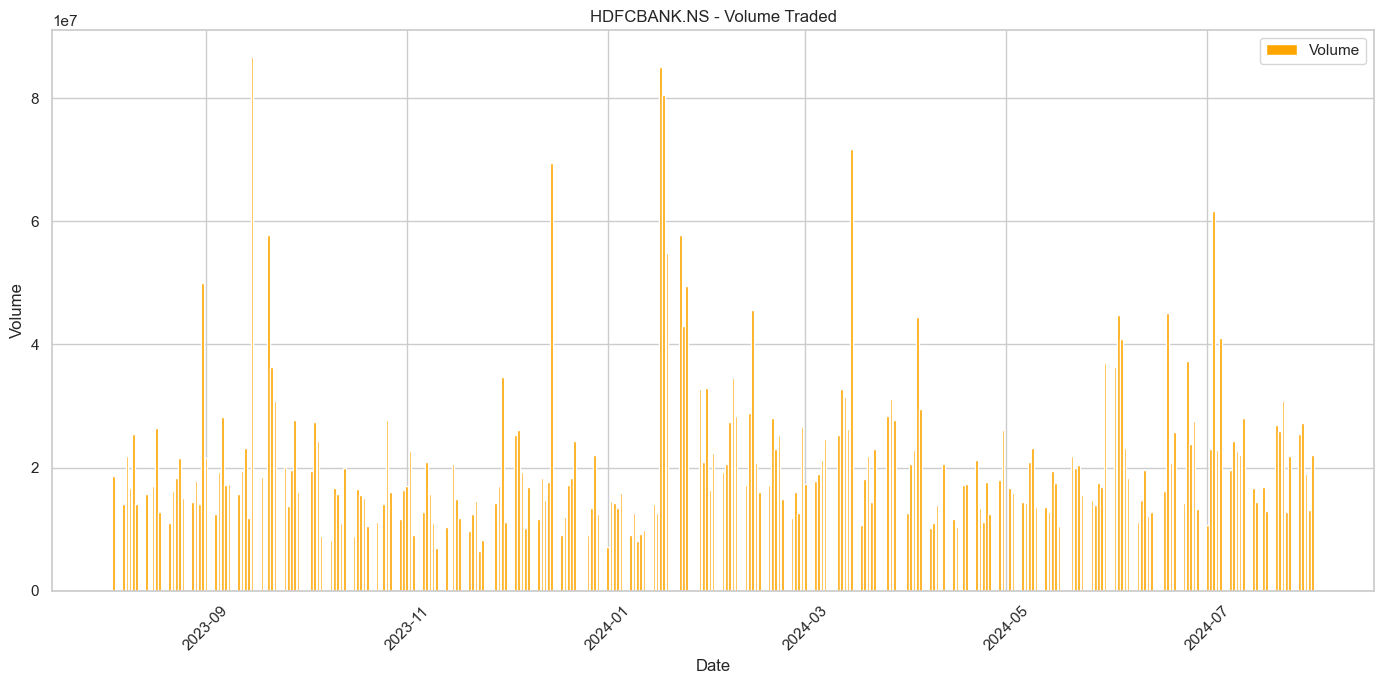

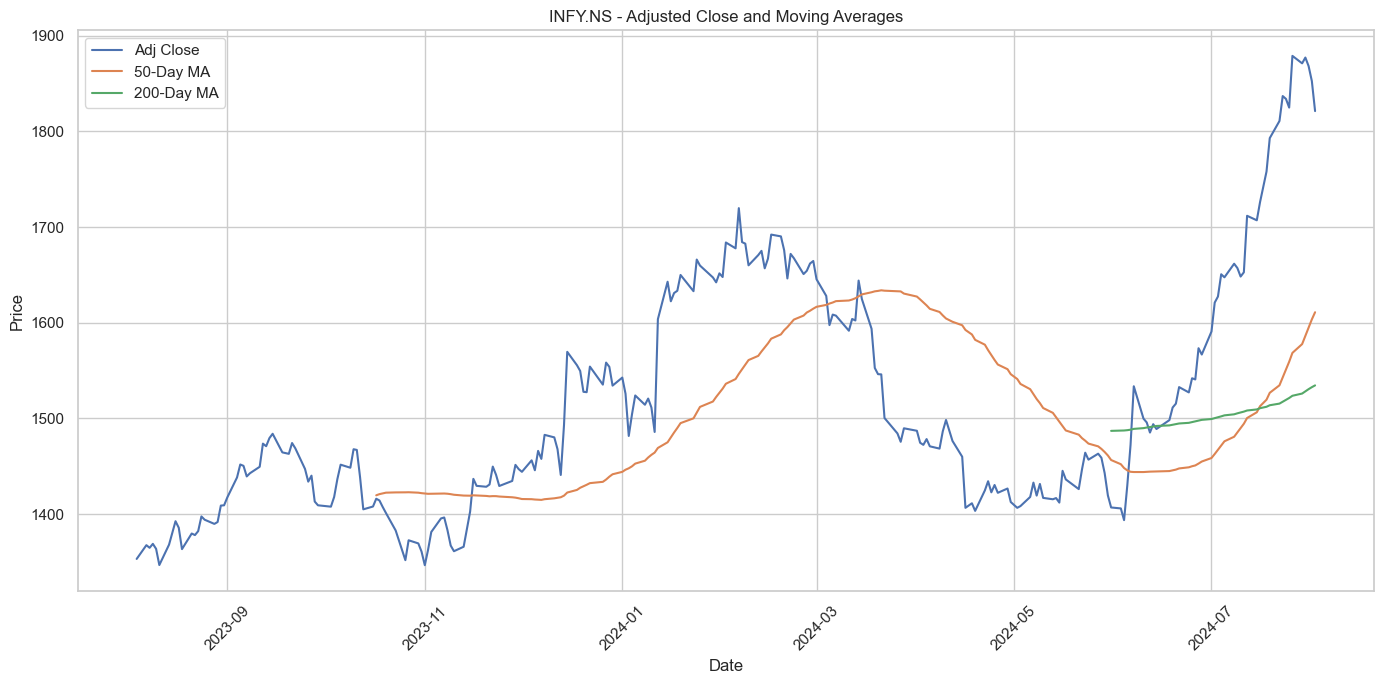

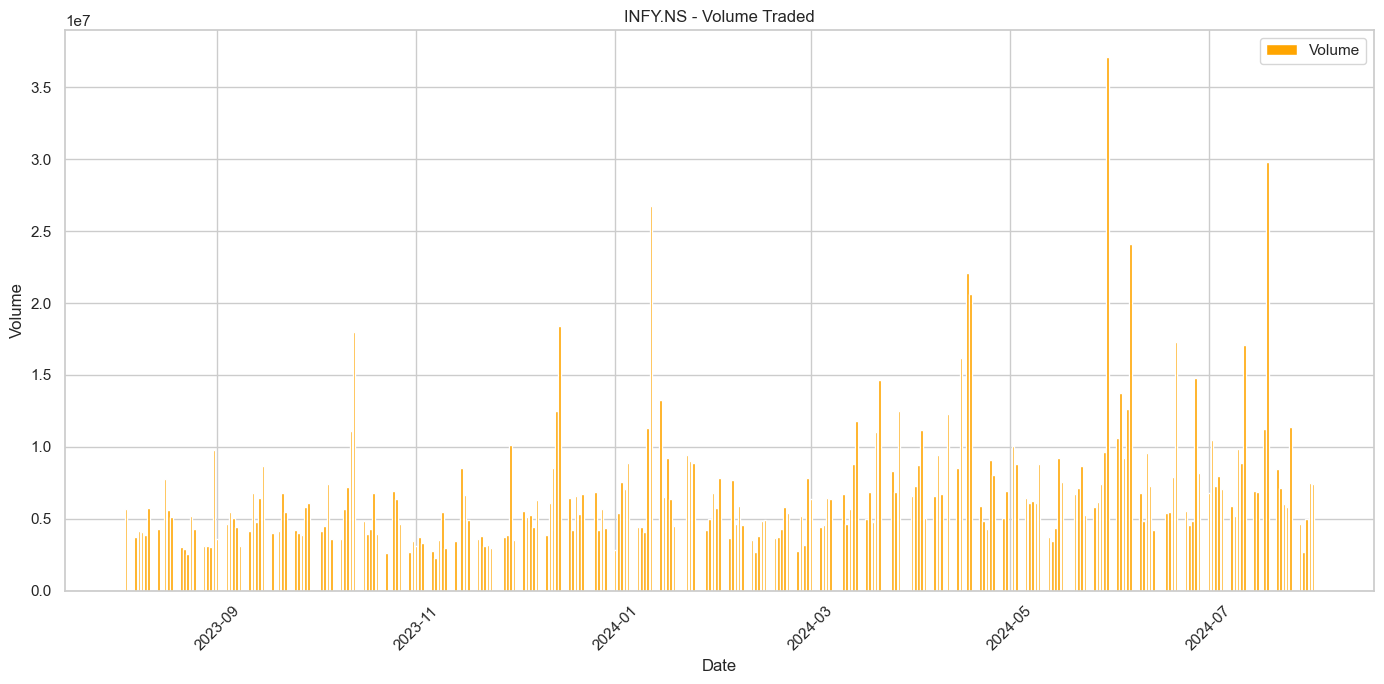

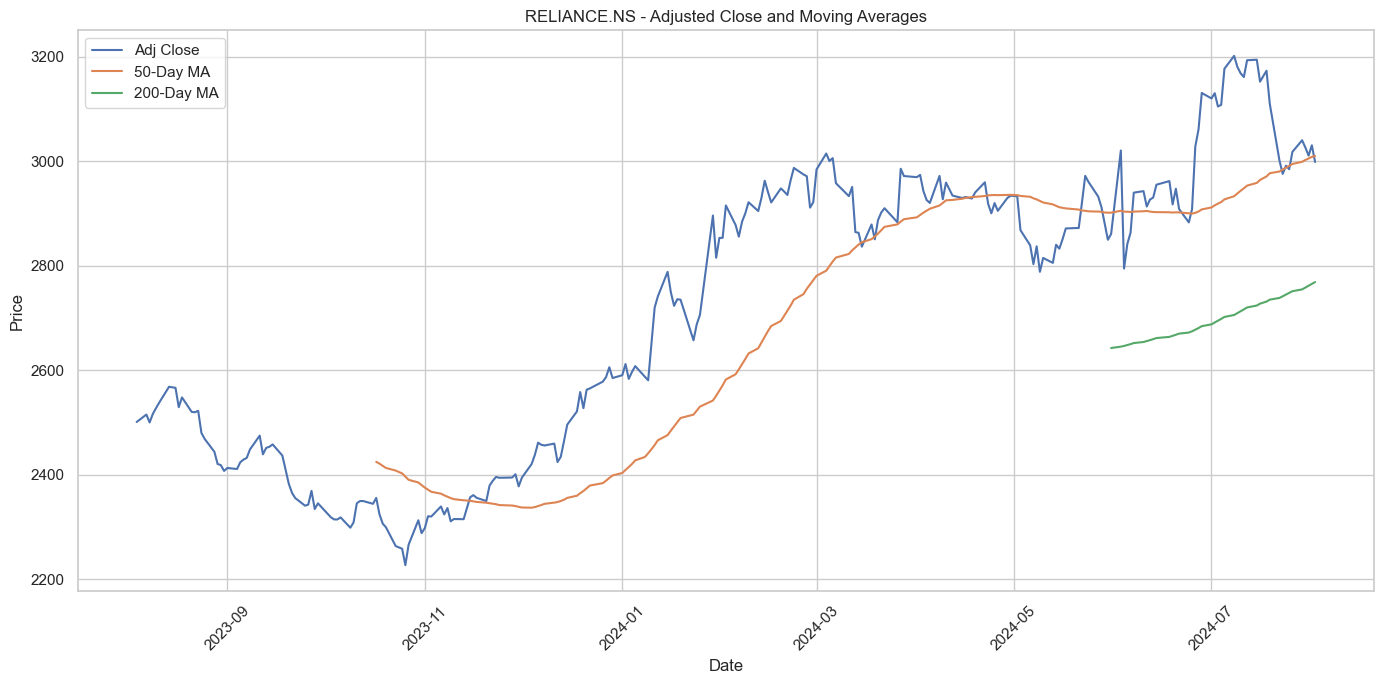

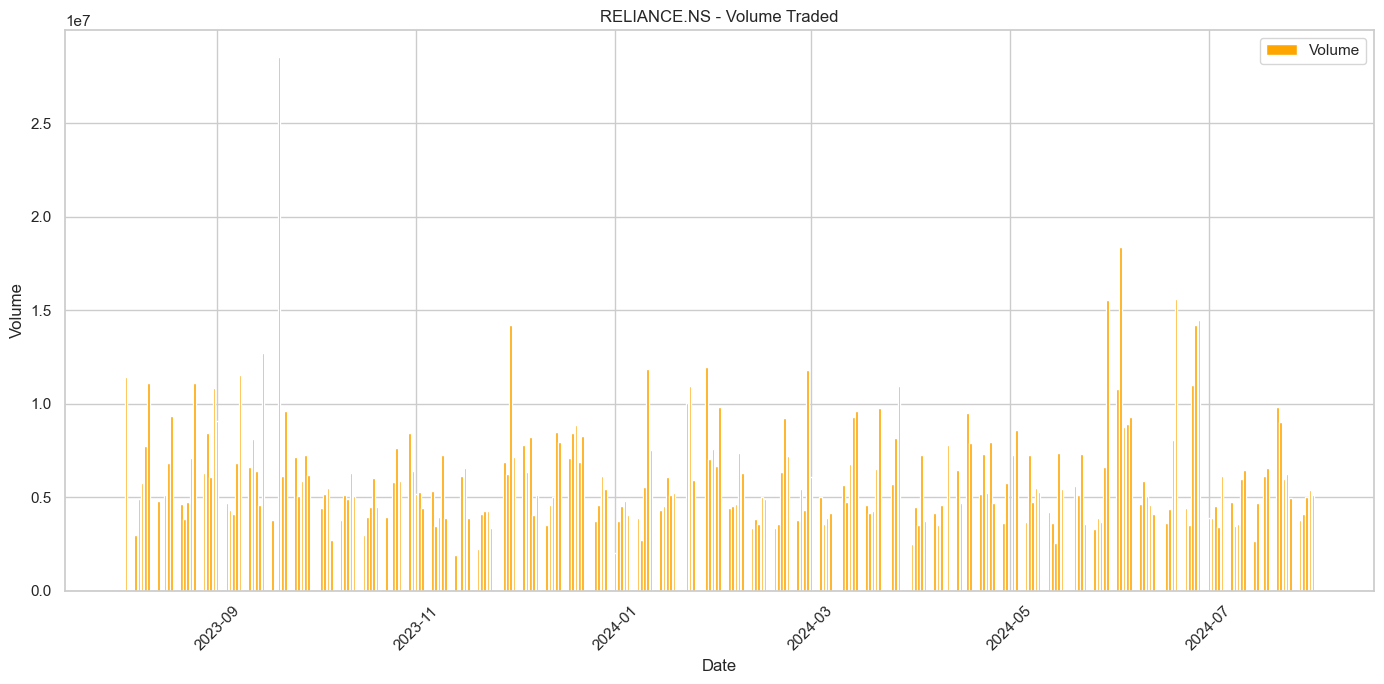

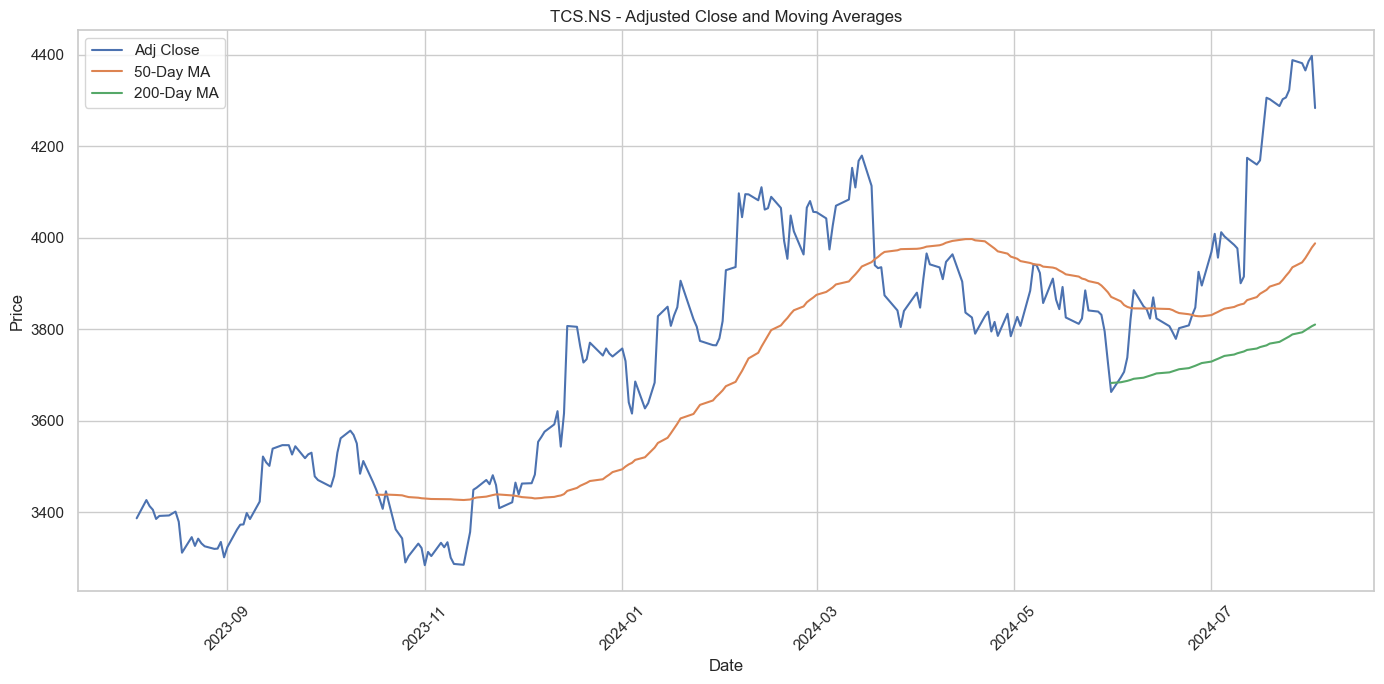

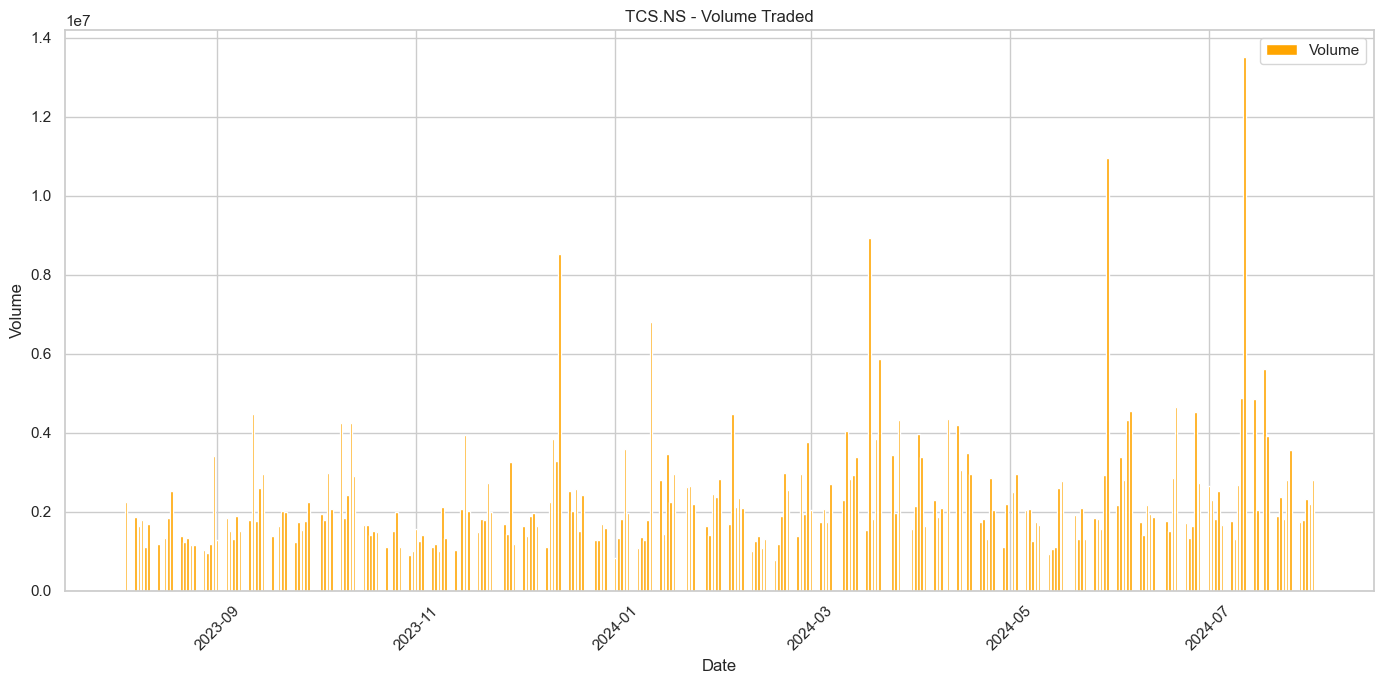

In [7]:
'''50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock'''
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, 
particularly noticeable in HDFCBANK and RELIANCE around early 2024

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

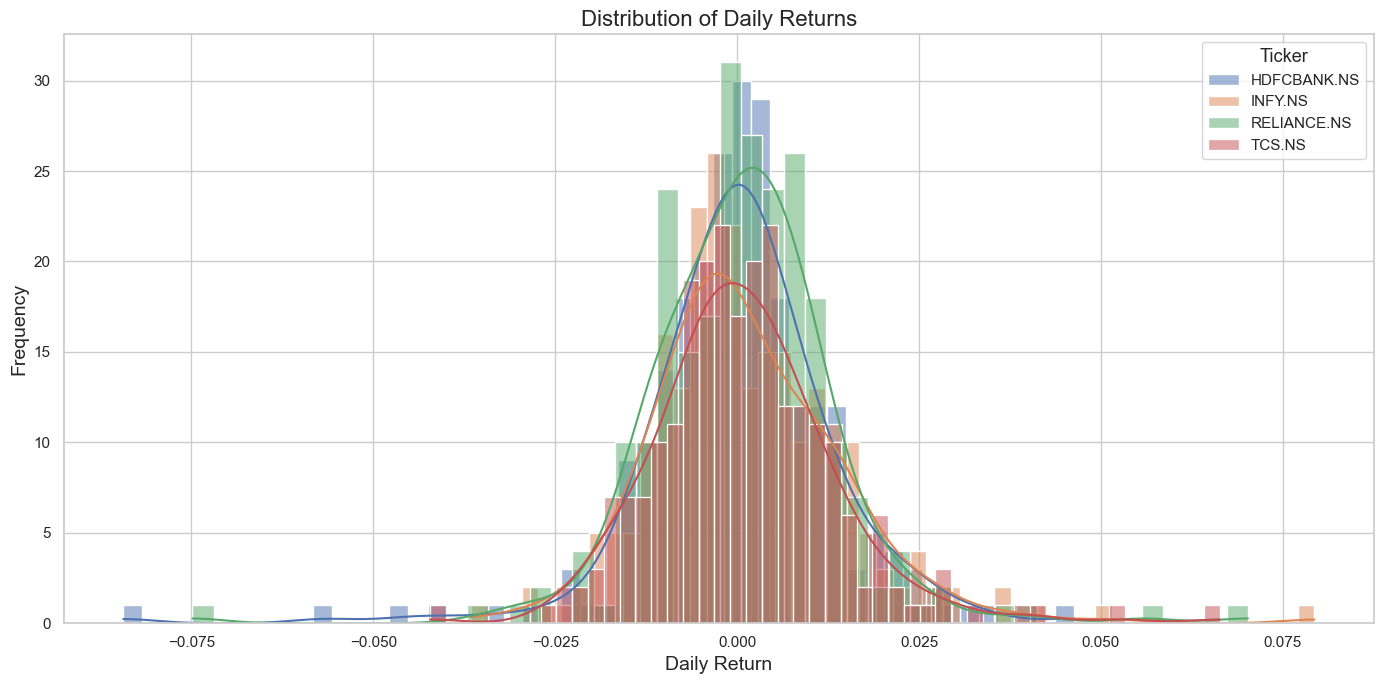

In [12]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

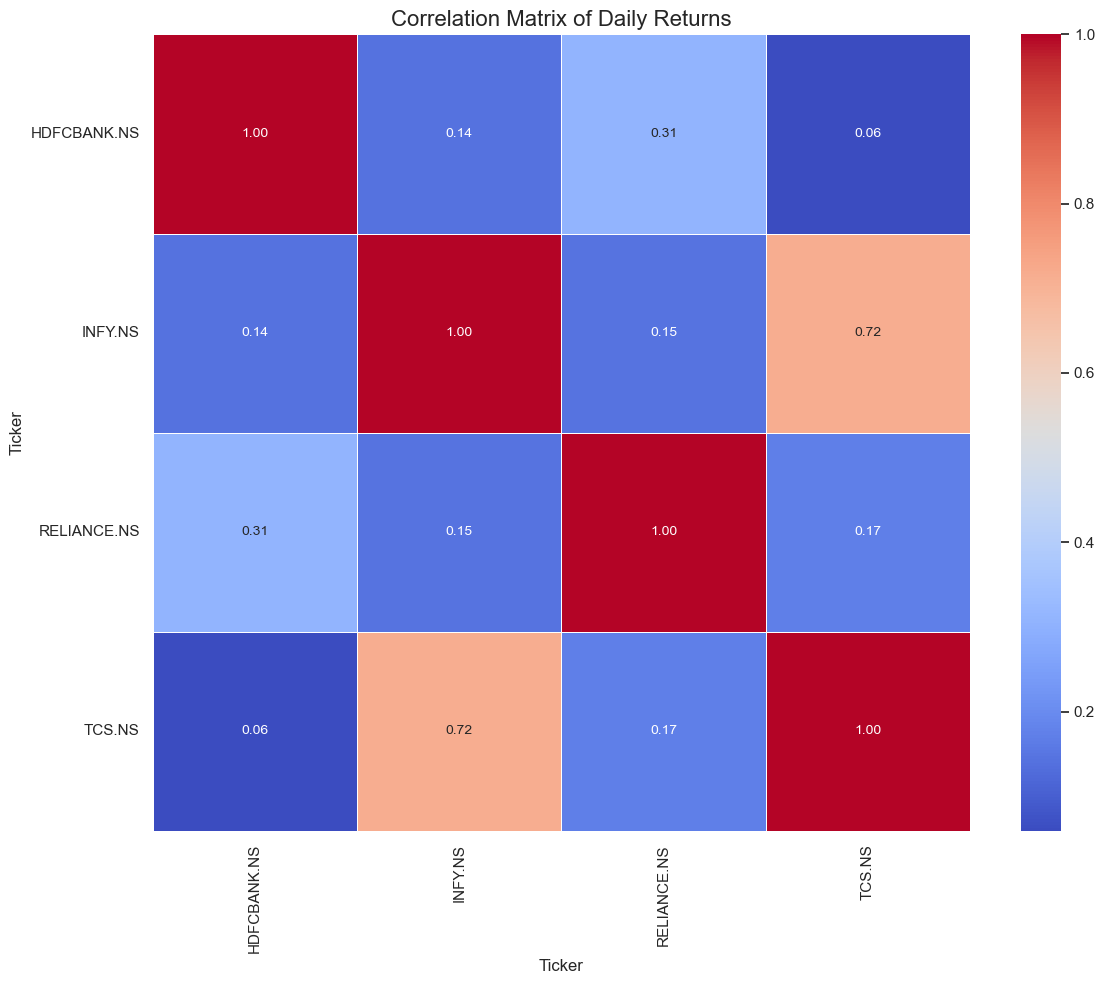

In [13]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

combining stocks with lower correlations can reduce overall portfolio risk.
INFY and TCS have a high positive correlation , which indicates that they tend to move in the same direction

In [14]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.041187,0.212197
INFY.NS,0.332273,0.214776
RELIANCE.NS,0.211093,0.210004
TCS.NS,0.264915,0.202066


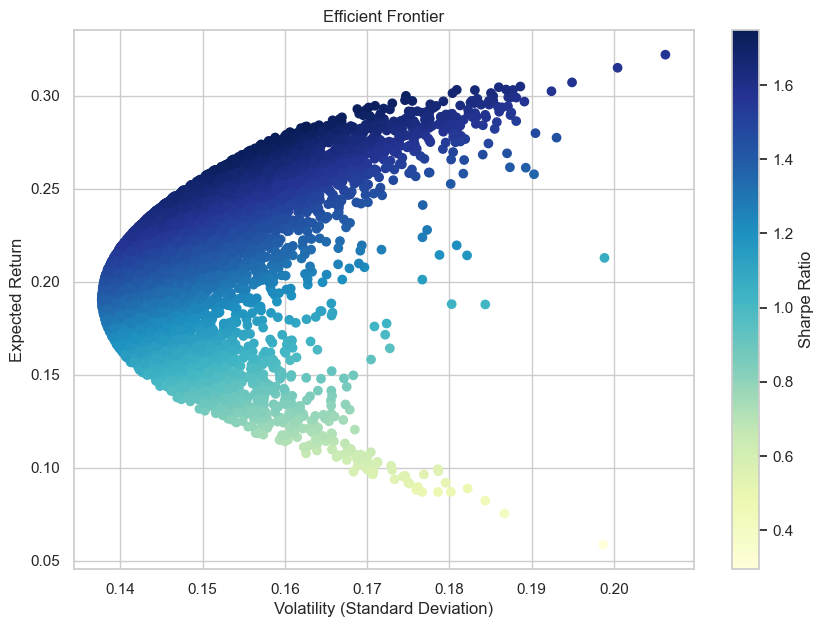

In [15]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

In [16]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.2775372164511438, 0.15882606990475323, 1.7474285966880674)

In [17]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.200534
1,INFY.NS,0.312045
2,RELIANCE.NS,0.307823
3,TCS.NS,0.179599


TCS has the highest allocation, which indicates its significant contribution to the portfolio’s performance,
while INFY has the smallest allocation. This balanced allocation aims to maximize returns
while minimizing risk by leveraging individual stock performances and their correlations.



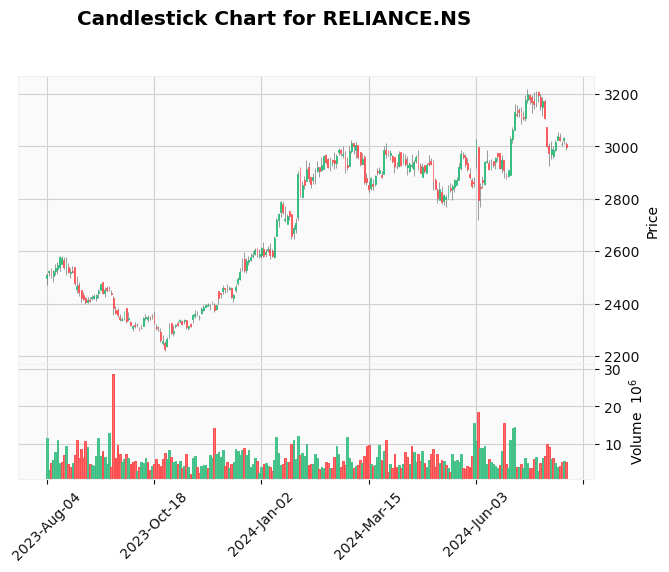

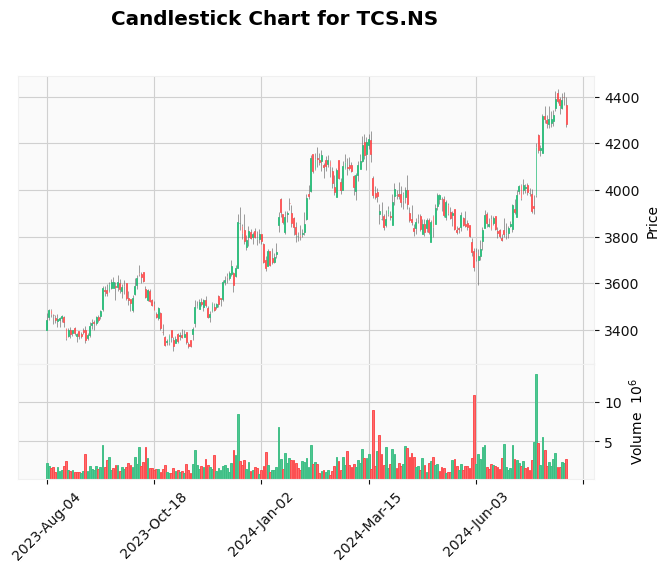

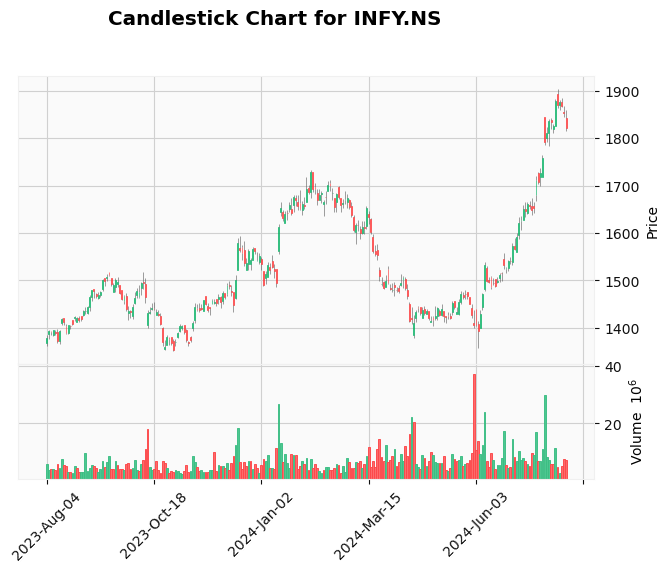

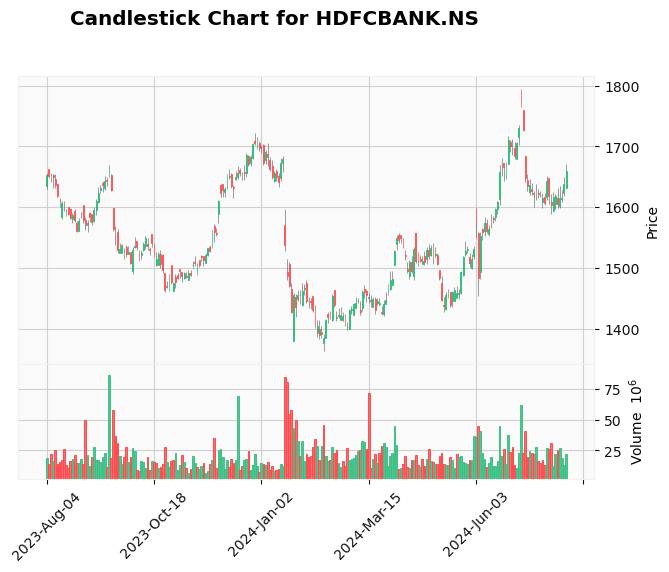

In [21]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
from datetime import date, timedelta

# Define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# List of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

# Loop through each ticker to download data and plot the candlestick chart
for ticker in tickers:
    # Download data
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    
    # Ensure that the index is set as DatetimeIndex
    data.index = pd.to_datetime(data.index)
    
    # Plot candlestick chart
    mpf.plot(data, type='candle', volume=True, style='yahoo', title=f'Candlestick Chart for {ticker}')


In [2]:
!pip install mplfinance


     -------------------------------------- 75.0/75.0 kB 830.5 kB/s eta 0:00:00


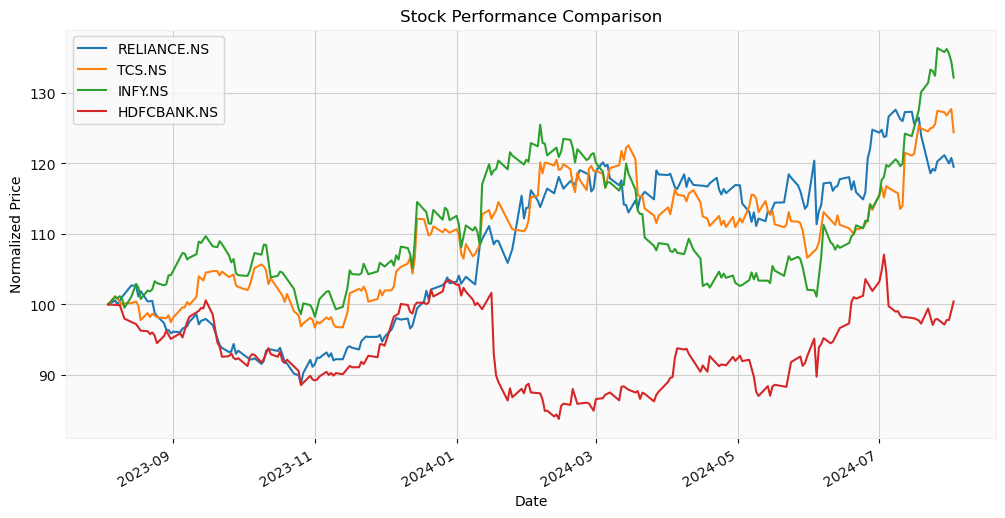

In [28]:


# Define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# List of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

# Download data
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# Normalize the closing prices to 100 for comparison
normalized_data = pd.DataFrame()

for ticker in tickers:
    normalized_data[ticker] = data['Close'][ticker] / data['Close'][ticker].iloc[0] * 100

# Plot normalized prices
normalized_data.plot(figsize=(12, 6))
plt.title('Stock Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(tickers)
plt.show()
